In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('teleCust1000t.csv')
data


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27,3,0,0,1,3,1
996,1,7,34,0,2,22,5,5,0,1,1,1
997,3,67,59,0,40,944,5,33,0,1,1,4
998,3,70,49,0,18,87,2,22,0,1,1,3


In [4]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


# Data Visualization and Analysis 

In [6]:
data['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

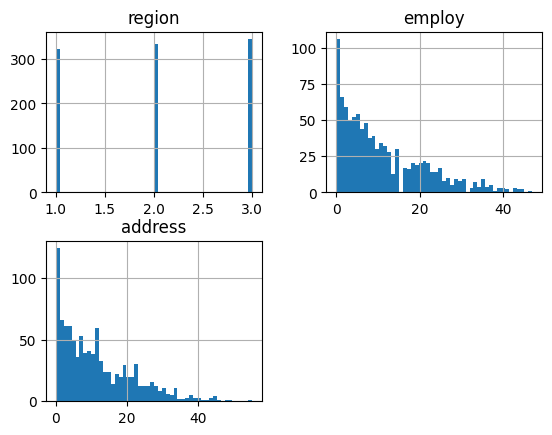

In [14]:
x=data[['region','employ','address']]
x.hist(bins=50)
plt.show()

In [16]:
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [18]:
X = data[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values 
X[0:5]

array([[  2,  13,  44,   1,   9,  64,   4,   5,   0,   0,   2],
       [  3,  11,  33,   1,   7, 136,   5,   5,   0,   0,   6],
       [  3,  68,  52,   1,  24, 116,   1,  29,   0,   1,   2],
       [  2,  33,  33,   0,  12,  33,   2,   0,   0,   1,   1],
       [  2,  23,  30,   1,   9,  30,   1,   2,   0,   0,   4]],
      dtype=int64)

In [19]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


# dependent variable 

In [23]:
y=data['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

# Train Test Split

## Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

## It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

## This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (500, 11) (500,)
Test set: (500, 11) (500,)


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [31]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([4, 1, 1, 4, 4], dtype=int64)

# Accuracy evaluation

# In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [32]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.58
Test set Accuracy:  0.3


# What about other K?

# K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.
# We can calculate the accuracy of KNN for different values of k.

In [33]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.278, 0.28 , 0.292, 0.3  , 0.328, 0.328, 0.348, 0.35 , 0.34 ])